In [23]:
import numpy as np
import scipy as sp
from copy import deepcopy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
T = 1
K = 99
r = 0.06
S0 = 100
sigma = 0.2

### Option price MC estimate (vanilla)

mean: 4.78022339449
std: 0.0795357029701


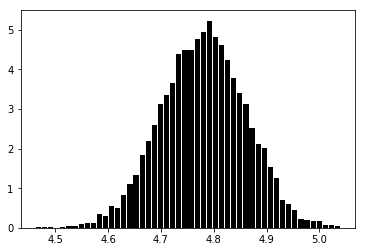

In [41]:
def stock_euler(Sn, r, sigma, T, dt):
    for i in np.arange(0, T+dt, dt):
        Sn += Sn*(r*dt + sigma*np.random.normal(0, 1)*np.sqrt(dt))
    return Sn

def stock_integration(S0, r, sigma, T):
    return S0*np.exp( (r - (sigma**2/2))*T + sigma*np.random.normal(0, 1)*np.sqrt(T))

N = 50
dt = T/N

estimates = 10000
sims = 10000

est_list = []
for est in range(estimates):
    sim_list = []
    for sim in range(sims):
        sim_list.append( stock_integration(S0, r, sigma, T) )
    payoff_sum = 0
    for val in sim_list:
        payoff_sum += max(K-val, 0)
    est_list.append( np.exp(-r*T)*(payoff_sum/len(sim_list)) )
    
plt.hist(est_list, bins=50, density=True, rwidth=0.85, color='black')
print('mean:', np.mean(est_list))
print('std:', np.std(est_list))

### Option price MC estimate as function of sigma

Text(0, 0.5, 'mean option price')

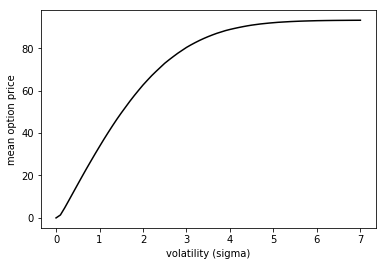

In [50]:
estimates = 1000
sims = 1000

s_range = np.arange(0, 7.1, .1)
sigma_v_price = []

for s in s_range:
    est_list = []
    for est in range(estimates):
        sim_list = []
        for sim in range(sims):
            sim_list.append( stock_integration(S0, r, s, T) )
        payoff_sum = 0
        for val in sim_list:
            payoff_sum += max(K-val, 0)
        est_list.append( np.exp(-r*T)*(payoff_sum/len(sim_list)) )
    sigma_v_price.append(np.mean(est_list))

plt.plot(s_range, sigma_v_price, c='black')
plt.xlabel('volatility (sigma)')
plt.ylabel('mean option price')